<a href="https://colab.research.google.com/github/listyantidewi1/solusi-codingbat/blob/main/LinearRegressionUnivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    x          y
0  24  21.549452
1  50  47.464463
2  15  17.218656
3  38  36.586398
4  87  87.288984


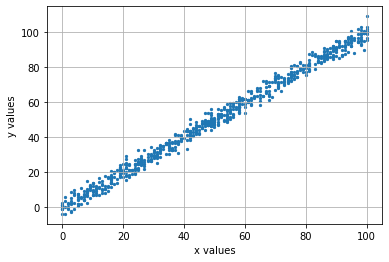

iteration: 0 cost:  743.4332672935938
iteration: 400 cost:  3.9352561522452434
iteration: 800 cost:  3.9352370922739954
iteration: 1200 cost:  3.9352228867692007
iteration: 1600 cost:  3.9352133946778873
iteration: 2000 cost:  3.935208478193514
iteration: 2400 cost:  3.935208002687018
iteration: 2800 cost:  3.9352118366393762
iteration: 3200 cost:  3.9352198515754337
iteration: 3600 cost:  3.9352319219992205
iteration: 4000 cost:  3.9352479253304566
iteration: 4400 cost:  3.9352677418424737
iteration: 4800 cost:  3.93529125460133
iteration: 5200 cost:  3.9353183494062476
iteration: 5600 cost:  3.935348914731232
iteration: 6000 cost:  3.9353828416678653
iteration: 6400 cost:  3.93542002386934
iteration: 6800 cost:  3.9354603574955958
49.951286222125134


In [5]:
import pandas as pd                 # library utk membaca dataset                 
data = pd.read_csv("train.csv")     # baca data dari file train.csv, simpan di variabel data          
print(data.head())                  # print header data (baris pertama yg berisi judul setiap kolom)  

X = data['x']; Y = data['y']        # salin kolom x ke variabel X, dan kolom y ke variabel Y
X = X.tolist()                      # konversi tipe kolom X dan Y menjadi list
Y = Y.tolist()

import matplotlib.pyplot as plt     # import library untuk menggambar grafik
plt.scatter(X, Y, s = 5)            # buat scatterplot dari data X di sumbu x, data Y di sumbu y, dan s (tebal titik) = 5
plt.grid()                          # atur grafik sehingga menampilkan grid
plt.xlabel("x values")              # beri label/legend pada sumbu x sebagai "x values"
plt.ylabel("y values")              # beri label/legend pada sumbu y sebagai "y values"
plt.show()                          # tampilkan grafik


# algoritma gradient descent untuk mencari parameter w dan b yang optimal
# alpha = learning rate, biasanya antara 0.001 hingga 0.1
# X adalah data pada sumbu x
# Y adalah data pada sumbu y
def gradient_descent(X, Y, w, b, alpha):
 
    dl_dw = 0.0                     # variabel sementara untuk menghitung -1 * X * (Y - (w * X + b)) dari seluruh data
    dl_db = 0.0                     # variabel sementara untuk menghitung -1 * (Y - (w * X + b)) dari seluruh data
    N = len(X)                      # hitung banyak data X, simpan di N

    # rumus gradient descent:
    # w = w - (1/N) * dl_dw * alpha
    # b = b - (1/N) * dl_db * alpha 

    for i in range(N):              # iterasi sebanyak jumlah data (N)
        dl_dw += -1*X[i] * (Y[i] - (w*X[i] + b))
        dl_db += -1*(Y[i] - (w*X[i] + b))

    w = w - (1/float(N)) * dl_dw * alpha
    b = b - (1/float(N)) * dl_db * alpha

    return w, b

# fungsi untuk menghitung total error (total kesalahan prediksi)
def cost_function (X, Y, w, b):
  # X = dataset kolom x (sumbu x)
  # Y = dataset kolom y (sumbu y)
  # N = banyak data kolom X
  # w dan b adalah parameter yg diperoleh dari fungsi gradient descent
  # rumus: total_error = 1/2 * (Y - (w * X - b)) ** 2


    N = len(X)                    # hitung banyak data X
    total_error = 0.0             # variabel total error untuk menyimpan hasil perhitungan cost function, diberi nilai awal 0
    for i in range(N):            # hitung error untuk setiap data, berulang sebanyak banyak data
        total_error += (Y[i] - (w*X[i] - b))**2

        
    return total_error / (2*float(N))
    

# rumus regresi =>
# prediksi = w * x + b
# w dan b dicari oleh fungsi gradient descent
def train(X, Y, w, b, alpha, n_iter):

    for i in range(n_iter):
        w, b = gradient_descent(X, Y, w, b, alpha)

        if i % 400 == 0:
            print ("iteration:", i, "cost: ", cost_function(X, Y, w, b))


    return w, b


def predict(x, w, b):
	return x*w + b


w, b = train(X, Y, 0.0, 0.0, 0.0001, 7000)
x_new = 50.0
y_new = predict(x_new, w, b)
print(y_new)